Keras: sequential API, Functional API, Subclassing ApI

1.   sequential API: 입력층, 은닉층, 출력층이 일렬로 딥러닝의 모형이 설계될 때 사용
2.   Functional API: 은닉층, 출력층의 입력 데이터를 마치 함수처럼 사용하여 다중 입력, 다중 출력, 임의의 입력층, 은닉층, 출력층을 순서에 관계없이 연결하여 사용 -> 다양하고 유연한 딥러닝 모형 설계시 사용
3. Subclassing ApI: 회로형, 조건부 딥러닝 모형 등의 맞춤형 딥러닝 모형 설계 시 사용





In [ ]:
import tensorflow as tf  #tensorflow를 tf로 축약하여 사용
a=tf.constant([[1,2,3],[4,5,6]])   #tensor 생성 
#tf.constant에서 생성된 자료는 slicing, 연산은 가능하지만 자료값은 수정할 수 없음
print(a)
print(a.shape)   #크기와 데이터 형태를 확인
print(a.dtype)

tf.Tensor(
[[1 2 3]
 [4 5 6]], shape=(2, 3), dtype=int32)
(2, 3)
<dtype: 'int32'>


In [ ]:
a[:,:2]  

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[1, 2],
       [4, 5]], dtype=int32)>

In [ ]:
a_1=a[...,1]
a_2=a[...,1,tf.newaxis]
print(a_1)
print(a_2)

tf.Tensor([2 5], shape=(2,), dtype=int32)
tf.Tensor(
[[2]
 [5]], shape=(2, 1), dtype=int32)


In [ ]:
b_0=a+100
b_1=tf.square(a)
print(b_0)
print(b_1)

tf.Tensor(
[[101 102 103]
 [104 105 106]], shape=(2, 3), dtype=int32)
tf.Tensor(
[[ 1  4  9]
 [16 25 36]], shape=(2, 3), dtype=int32)


In [ ]:
a.numpy()  #tensor에서 numpy 배열로 변환

array([[1, 2, 3],
       [4, 5, 6]], dtype=int32)

In [ ]:
import numpy as np
c=np.array([[1,2],[3,4],[5,6]])
d_1=tf.transpose(c)
d_2=c.T

In [ ]:
print(c)
print(d_1)
print(d_2)

[[1 2]
 [3 4]
 [5 6]]
tf.Tensor(
[[1 3 5]
 [2 4 6]], shape=(2, 3), dtype=int64)
[[1 3 5]
 [2 4 6]]


In [ ]:
t1=1
t2=100.
tf.cast(t1,tf.float32)+t2  
#tensorflow: 자료형이 일치해야 연산이 가능 -> tf.cast로 자료형을 통일하는 것 필요

<tf.Tensor: shape=(), dtype=float32, numpy=101.0>

In [ ]:
k=tf.Variable([[1.,2,3],[4,5,6]])  #tf.variable은 수정 가능한 텐서를 생성
print(k)

<tf.Variable 'Variable:0' shape=(2, 3) dtype=float32, numpy=
array([[1., 2., 3.],
       [4., 5., 6.]], dtype=float32)>


In [ ]:
tf.constant([[1,2,3],[4,5,6]])

<tf.Tensor: shape=(2, 3), dtype=int32, numpy=
array([[1, 2, 3],
       [4, 5, 6]], dtype=int32)>

In [ ]:
k.assign(k**2)  #assign 함수로 값을 변경할 수 있음

<tf.Variable 'UnreadVariable' shape=(2, 3) dtype=float32, numpy=
array([[ 1.,  4.,  9.],
       [16., 25., 36.]], dtype=float32)>

In [ ]:
k[0,1].assign(100)  #assign 함수로 값을 변경

<tf.Variable 'UnreadVariable' shape=(2, 3) dtype=float32, numpy=
array([[  1., 100.,   9.],
       [ 16.,  25.,  36.]], dtype=float32)>

In [ ]:
k[:,2].assign([0,0]) #assign 함수로 값을 변경

<tf.Variable 'UnreadVariable' shape=(2, 3) dtype=float32, numpy=
array([[  1., 100.,   0.],
       [ 16.,  25.,   0.]], dtype=float32)>

In [ ]:
k.scatter_nd_update(indices=[[0,0],[1,0]],updates=[999,999]) 
#assign 함수는 tensor의 구성요소를 동시에 지정할 수 없다. -> 이 경우, scatter_nd_update를 사용

<tf.Variable 'UnreadVariable' shape=(2, 3) dtype=float32, numpy=
array([[999., 100.,   0.],
       [999.,  25.,   0.]], dtype=float32)>

# Sequnntial API / MLP

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt

#data 불러오기
(x_train, y_train),(x_test, y_test)=mnist.load_data()
print(x_train.shape)   #3D-tensor
print(x_test.shape)    #3D-tensor
print(y_train.shape)   #1D-tensor

11501568/11490434 [==============================] - 0s 0us/step
(60000, 28, 28)
(10000, 28, 28)
(60000,)


In [ ]:
unique,counts=np.unique(y_train,return_counts=True)   #값들의 분포를를 알 수 있고 균형감있는 분포를 볼 수 있다.
print('Train labels: ', dict(zip(unique, counts)))    #dictionary data type을 출력
unique,counts=np.unique(y_test,return_counts=True)   
print('Test labels: ', dict(zip(unique, counts))) 

Train labels:  {0: 5923, 1: 6742, 2: 5958, 3: 6131, 4: 5842, 5: 5421, 6: 5918, 7: 6265, 8: 5851, 9: 5949}
Test labels:  {0: 980, 1: 1135, 2: 1032, 3: 1010, 4: 982, 5: 892, 6: 958, 7: 1028, 8: 974, 9: 1009}


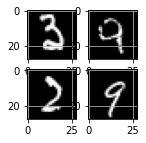

In [ ]:
#4개의 random sample 추출하기
indices=np.random.randint(0,x_train.shape[0],size=4)
images=x_train[indices]
labels=y_train[indices]

#4개의 표본 그림그리기
plt.figure(figsize=(2,2))
for i in range(len(indices)):
  plt.subplot(2,2,i+1)
  image=images[i]
  plt.imshow(image, cmap='gray')
  plt.grid('off')
plt.show()

In [ ]:
#One Hot Coding : library 불러오기
from tensorflow.keras.utils import to_categorical,plot_model
num_features=784  #MLP 모형 적합을 위해 이미지를 1D tensor 형태로 변환
x_train=x_train.reshape(-1,num_features).astype('float32')
x_test=x_test.reshape(-1,num_features).astype('float32')

#reshape 안에 '-1'을 해줌으로써 해당 axis의 값을 스스로 계산하게 함.

x_train=x_train/255.
x_test=x_test/255.

#10개의 범주형 자료를 one-hot 벡터로 바꿔주기/ 0-9를 one-hot 벡터로 바꿔주기 -> 아래의 utility 함수를 이용
from keras.utils import np_utils
y_train=np_utils.to_categorical(y_train)
y_test=np_utils.to_categorical(y_test)
num_classes=y_train.shape[1]
print(y_train.shape)

(60000, 10)


In [ ]:
x_val=x_train[:10000]
partial_x_train=x_train[10000:]
y_val=y_train[:10000]
partial_y_train=y_train[10000:]
print("partial_x_train",partial_x_train.shape)
print("partial_y_train",partial_y_train.shape)

partial_x_train (50000, 784)
partial_y_train (50000, 10)


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 256)               200960    
_________________________________________________________________
activation (Activation)      (None, 256)               0         
_________________________________________________________________
dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                2570      
Total params: 269,322
Trainable params: 269,322
Non-trainable params: 0
_________________________________________________________________


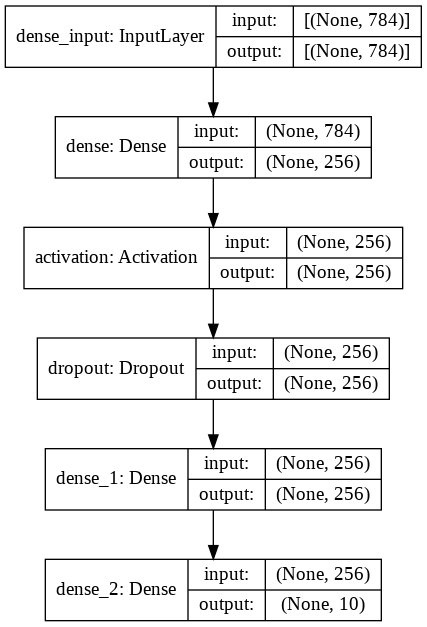

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout

# MLP 모형 사용: 2개의 은닉층, 1개의 출력층으로 구성된 모형 -> dense 사용
model=Sequential() 
model.add(Dense(256,input_dim=num_features)) #input: 1D tensor / num_feature=28*28=784 / 256개 node / parm=784*256+256(bias)=200960
model.add(Activation('relu')) #relu: 모수가 없음
model.add(Dropout(0.45))

model.add(Dense(256,activation='relu'))
model.add(Dense(num_classes,activation='softmax'))  #출력층: parm=256*10+10=5270

model.summary()
plot_model(model, to_file='D:\BDSC402\MLPmodel.png',show_shapes=True)

In [ ]:
model.compile(loss='categorical_crossentropy',optimizer='adam', metrics=['accuracy'])
history=model.fit(partial_x_train, partial_y_train, epochs=100, batch_size=64, validation_data=(x_val,y_val)) 
#epochs=100 : 50000개의 데이터를 100번 학습시킨다는 의미
#batch_size: 주로 2의 배수를 사용(1을 사용할 시, SDG) : 5000/64=781.25  이므로 각  epoches 별로 64개의 배치를 782회 학습
history_out=history.history
history_out.keys()

Epoch 1/100
782/782 [==============================] - 4s 5ms/step - loss: 0.3334 - accuracy: 0.8980 - val_loss: 0.1384 - val_accuracy: 0.9558
Epoch 2/100
782/782 [==============================] - 4s 5ms/step - loss: 0.1648 - accuracy: 0.9498 - val_loss: 0.1109 - val_accuracy: 0.9652
Epoch 3/100
782/782 [==============================] - 4s 5ms/step - loss: 0.1334 - accuracy: 0.9588 - val_loss: 0.0956 - val_accuracy: 0.9697
Epoch 4/100
782/782 [==============================] - 4s 5ms/step - loss: 0.1116 - accuracy: 0.9646 - val_loss: 0.0888 - val_accuracy: 0.9736
Epoch 5/100
782/782 [==============================] - 4s 5ms/step - loss: 0.0995 - accuracy: 0.9682 - val_loss: 0.0799 - val_accuracy: 0.9756
Epoch 6/100
782/782 [==============================] - 4s 5ms/step - loss: 0.0907 - accuracy: 0.9710 - val_loss: 0.0802 - val_accuracy: 0.9764
Epoch 7/100
782/782 [==============================] - 4s 5ms/step - loss: 0.0831 - accuracy: 0.9727 - val_loss: 0.0756 - val_accuracy: 0.9778

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

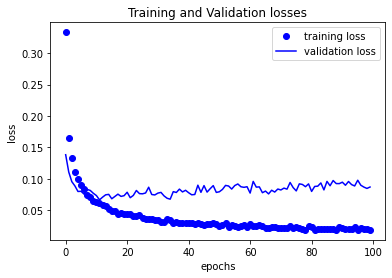

In [ ]:
import matplotlib.pyplot as plt

loss=history_out['loss']
loss_val=history_out['val_loss']
accuracy=history_out['accuracy']
accuracy_val=history_out['val_accuracy']
plt.plot(loss, 'bo', label='training loss')
plt.plot(loss_val,'b', label='validation loss')
plt.title('Training and Validation losses')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

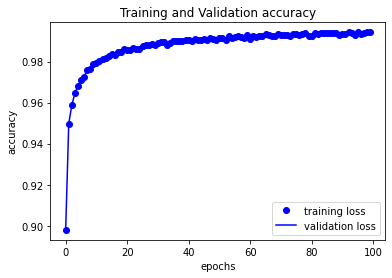

In [ ]:
plt.clf()
plt.plot(accuracy, 'bo', label='training loss')
plt.plot(accuracy,'b', label='validation loss')
plt.title('Training and Validation accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

In [ ]:
model.compile(loss='categorical_crossentropy',optimizer='adam', metrics=['accuracy'])
history=model.fit(x_train, y_train, epochs=100, batch_size=64, validation_data=(x_val,y_val)) 
history_out=history.history
history_out.keys()
#60000개의 자료를 사용, 학습횟수는 각 에폭당 60000/64=937.5 -> 938회

Epoch 1/100
938/938 [==============================] - 5s 5ms/step - loss: 0.0162 - accuracy: 0.9965 - val_loss: 2.8256e-04 - val_accuracy: 0.9999
Epoch 2/100
938/938 [==============================] - 4s 5ms/step - loss: 0.0154 - accuracy: 0.9961 - val_loss: 3.7718e-04 - val_accuracy: 1.0000
Epoch 3/100
938/938 [==============================] - 4s 5ms/step - loss: 0.0159 - accuracy: 0.9962 - val_loss: 1.5355e-04 - val_accuracy: 1.0000
Epoch 4/100
938/938 [==============================] - 4s 4ms/step - loss: 0.0179 - accuracy: 0.9957 - val_loss: 3.7521e-04 - val_accuracy: 0.9999
Epoch 5/100
938/938 [==============================] - 4s 5ms/step - loss: 0.0129 - accuracy: 0.9967 - val_loss: 1.8761e-04 - val_accuracy: 1.0000
Epoch 6/100
938/938 [==============================] - 4s 5ms/step - loss: 0.0184 - accuracy: 0.9959 - val_loss: 2.8905e-04 - val_accuracy: 0.9999
Epoch 7/100
938/938 [==============================] - 4s 5ms/step - loss: 0.0135 - accuracy: 0.9965 - val_loss: 3.724

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

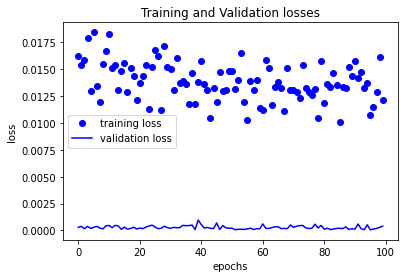

In [ ]:
import matplotlib.pyplot as plt

loss=history_out['loss']
loss_val=history_out['val_loss']
accuracy=history_out['accuracy']
accuracy_val=history_out['val_accuracy']
plt.plot(loss, 'bo', label='training loss')
plt.plot(loss_val,'b', label='validation loss')
plt.title('Training and Validation losses')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

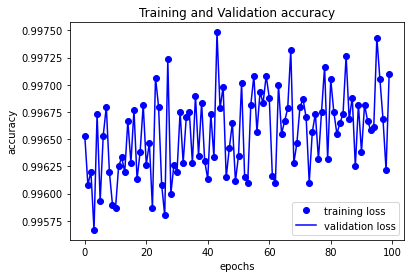

In [ ]:
plt.clf()
plt.plot(accuracy, 'bo', label='training loss')
plt.plot(accuracy,'b', label='validation loss')
plt.title('Training and Validation accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

In [ ]:
import pandas as pd
result_train=model.evaluate(x_train, y_train)
result_test=model.evaluate(x_test, y_test)
print(result_train)
print(result_test)

pred=model.predict(x_test)
pred=pd.DataFrame(pred)
pred.head()

313/313 [==============================] - 0s 1ms/step - loss: 0.1072 - accuracy: 0.9829
[0.0011931800981983542, 0.9997000098228455]
[0.10719159990549088, 0.9829000234603882]


,0,1,2,3,4,5,6,7,8,9
0,1.049556e-22,1.101501e-12,3.827672e-11,5.972579e-10,4.710122e-21,7.849884e-12,7.514755e-23,1.000000e+00,2.691042e-16,2.238525e-14
1,1.141523e-28,3.105538e-14,1.000000e+00,1.199773e-16,1.930503e-36,1.331716e-23,9.588755e-27,1.554455e-35,9.597741e-23,0.000000e+00
2,1.180195e-12,1.000000e+00,2.135505e-08,1.492164e-13,2.974532e-10,2.032383e-12,4.568410e-11,6.542538e-10,1.724587e-10,7.921121e-18
3,1.000000e+00,2.508519e-16,1.772551e-08,1.717653e-14,3.240783e-16,2.862393e-09,2.319517e-10,4.408817e-11,2.108160e-14,2.616803e-13
4,2.381953e-21,2.863935e-15,8.372965e-14,9.307753e-20,1.000000e+00,5.928871e-17,1.166008e-18,8.139257e-11,8.206699e-21,1.035690e-08


# Functional API / MLP

In [ ]:
import numpy as np
from keras.models import Model
from keras.layers import Dense, Dropout, Input

x=Input(shape=(num_features,))
h1=Dense(256,activation='relu')(x)  #표현 형식을 잘 비교할 것
h1=Dropout(0.45)(h1)
h2=Dense(num_classes,activation='relu')(h1)
out=Dense(num_classes, activation='softmax')(h2)
model=Model(inputs=x, outputs=out)  # model 객체화의 범위를 지정

In [ ]:
model.compile(loss='categorical_crossentropy',optimizer='adam', metrics=['acc'])
history=model.fit(x_train, y_train, epochs=100, batch_size=64) 

Epoch 1/100
938/938 [==============================] - 4s 3ms/step - loss: 0.4443 - acc: 0.8711
Epoch 2/100
938/938 [==============================] - 3s 3ms/step - loss: 0.1941 - acc: 0.9437
Epoch 3/100
938/938 [==============================] - 3s 3ms/step - loss: 0.1463 - acc: 0.9558
Epoch 4/100
938/938 [==============================] - 3s 3ms/step - loss: 0.1201 - acc: 0.9636
Epoch 5/100
938/938 [==============================] - 3s 3ms/step - loss: 0.1072 - acc: 0.9676
Epoch 6/100
938/938 [==============================] - 3s 3ms/step - loss: 0.0937 - acc: 0.9713
Epoch 7/100
938/938 [==============================] - 3s 3ms/step - loss: 0.0864 - acc: 0.9728
Epoch 8/100
938/938 [==============================] - 3s 3ms/step - loss: 0.0774 - acc: 0.9752
Epoch 9/100
938/938 [==============================] - 3s 3ms/step - loss: 0.0744 - acc: 0.9767
Epoch 10/100
938/938 [==============================] - 3s 3ms/step - loss: 0.0679 - acc: 0.9782
Epoch 11/100
938/938 [=================